# **<a>Lab_4:**
**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

> **Stack Overflow** is one of the most helpful and most visited websites on the internet, but it is also one of the most brutal platforms on the internet. People will show no mercy if we make a mistake, and that’s how the platform has maintained its standards ever since its inception. So, don’t expect anything less.

> ![](https://miro.medium.com/max/1400/1*IF-ngtmrMVZGKLrvfEEf-w.png)


> This photo by **Iva** on *Unsplash* [Source](https://betterprogramming.pub/how-to-ask-a-question-that-gets-answered-on-stack-overflow-45f87f1a2fef)

> # <a> Basic text preprocessing and topic modeling

> The goal of this assignment is to get familiar with textual data analysis.


> **Submission: submit via onq.** 


> #### Install some Packeges.

In [1]:
# install kaggle package
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data.
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 21.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=29716967750c2339f98fa705f5fb92a86df5f0aebf90d4923835efdfe1a32563
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [3]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download the data from kaggle
!kaggle datasets download ahmedsalamas/stackoverflow

 92% 89.0M/96.3M [00:02<00:00, 47.7MB/s]
100% 96.3M/96.3M [00:02<00:00, 37.8MB/s]


In [5]:
# unzip the data 
! unzip stackoverflow

Archive:  stackoverflow.zip
  inflating: Questions.csv           


In [6]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 

import pandas as pd #pandas is an open source data analysis library

from bs4 import BeautifulSoup
import lxml
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import wordnet

from sklearn.decomposition import PCA
from matplotlib import pyplot

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import CoherenceModel


import matplotlib.pyplot as plt
%matplotlib inline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


> # <A> Task 1: 

> The given dataset is a table containing questions about R on StackOverflow site. 

> Your first task is to perform standard text prepossessing steps introduced in lectures for future tasks. 

> You can perform analysis on `title` or `body` of the questions.

> ### Importing Data

In [7]:
# load the data.
df = pd.read_csv('/content/Questions.csv')

In [8]:
df

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...
...,...,...,...,...,...,...
189925,46395878,1823293.0,2017-09-24T23:43:50Z,1,GET command in httr not returning anything aft...,<p>I'm trying to access NBA's stats api which ...
189926,46395904,8666903.0,2017-09-24T23:49:42Z,2,R-shiny: Discrete value supplied to continuous...,<p>So I am using mpg dataset to practice my R-...
189927,46395907,8663707.0,2017-09-24T23:50:13Z,2,Confidence interval for quantile regression us...,<p>I am trying to get the five types of bootst...
189928,46395927,8061255.0,2017-09-24T23:52:32Z,1,Time lag analysis on list of imputed datasets,<p>My question and data is similar to the post...


> ## <a> Basic data exploration</a>

> The basic data exploration includes the following pandas methods:

> 1. `info()` for printing a summary about the columns and data types in the dataframe.
2. `head()` for showing the first 5 rows in the dataframe.
3. `isnull()` returns the number of missing values in the data set.


> If we want to see what all the data types are in a dataframe, use `df.dtypes` or  the `df.info()` function shows even more useful info.

In [9]:
# summary of the data including non-null counts

# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189930 entries, 0 to 189929
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            189930 non-null  int64  
 1   OwnerUserId   188729 non-null  float64
 2   CreationDate  189930 non-null  object 
 3   Score         189930 non-null  int64  
 4   Title         189930 non-null  object 
 5   Body          189930 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.7+ MB


> **Notes on the previous cell** : 

> After looking at the automatically assigned data types, the types of data are `float` , `int` and `object`

In [10]:
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


In [11]:
# The function dataframe.isnull().sum() returns the number of missing values in the data set. 
df.isnull().sum()

Id                 0
OwnerUserId     1201
CreationDate       0
Score              0
Title              0
Body               0
dtype: int64


>Through my use of `duplicated()` function with **Parameter** : `subset=None` to consider all attributes for identifying duplicates and to remove those duplicates have been used `drop_duplicates()` function.

In [12]:
# use the DataFrame.duplicated() method to return a series of boolean values
df.duplicated(subset=None)

0         False
1         False
2         False
3         False
4         False
          ...  
189925    False
189926    False
189927    False
189928    False
189929    False
Length: 189930, dtype: bool

> **Notes on the previous cell** : 

> Because of the large amount of data, we cannot determine whether there is duplicates or not, so we need to use `unique()` or `sum()`

In [13]:
df.duplicated().unique() #returns a list of unique values

array([False])

> ### <a>Preprocess Data

*  Remove special characters from title and body
*  Remove stop words
*  Remove HTML tags
*  Convert characters to lowercase
*  Lemmatize the words

> **Note :** I cleaned up the `Title` and `Body` column and was planning to compare the results for both but I found the data for the body column is too large so I cleaned up the body column for future work and will continue my approach with the `Title` column.

In [14]:
# nltk packages
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
# Filter out HTML
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, "lxml").get_text()) 

token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [16]:
# to remove whitespaces from string elements of my list.
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [17]:
# method to remove stop words
def removeStopWords(text):
    #Convert to lower case
    text = text.lower()
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [18]:
#  method to remove punctuation 
def removePunctuation(text):
    # to remove any links
    # specifically to clean the body column from any links
    re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    text = re.sub(re_url, '', text)
    punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~-'
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
      punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [19]:
# lemmatization function.
def lemmatizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x.lower())
    return ' '.join(map(str, listLemma))

In [20]:
# Remove stopwords, punctuation and lemmatize for text in body
df['Body'] = df['Body'].apply(lambda x: removeStopWords(x))
df['Body'] = df['Body'].apply(lambda x: removePunctuation(x))
df['Body'] = df['Body'].apply(lambda x: lemmatizeWords(x))

In [21]:
# Remove stopwords, punctuation and lemmatize for title. Also weight title 3 times
df['Title'] = df['Title'].apply(lambda x: str(x)) 
df['Title'] = df['Title'].apply(lambda x: removeStopWords(x)) 
df['Title'] = df['Title'].apply(lambda x: removePunctuation(x)) 
df['Title'] = df['Title'].apply(lambda x: lemmatizeWords(x)) 
df['Title']

0                                  access last value vector
1                 worse sin side effect pass massive object
2                               explain quantile function r
3                                           test eof flag r
4                r package learn dirichlet prior count data
                                ...                        
189925             get command httr return anything minutes
189926        rshiny discrete value supply continuous scale
189927    confidence interval quantile regression use bo...
189928               time lag analysis list impute datasets
189929    conditionally format text shiny give lookup he...
Name: Title, Length: 189930, dtype: object

In [22]:
df['Title'][0]

'access last value vector'

In [23]:
df

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,access last value vector,suppose vector nest dataframe one two level qu...
1,79709,NaN,2008-09-17T03:39:16Z,3,worse sin side effect pass massive object,function inside loop inside function inner fun...
2,95007,15842.0,2008-09-18T17:59:19Z,56,explain quantile function r,mystify r quantile function day intuitive noti...
3,103312,NaN,2008-09-19T16:09:26Z,4,test eof flag r,test eof flag r example f file fname rb readbi...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,r package learn dirichlet prior count data,look r package use train dirichlet prior count...
...,...,...,...,...,...,...
189925,46395878,1823293.0,2017-09-24T23:43:50Z,1,get command httr return anything minutes,try access nba stats api particularly document...
189926,46395904,8666903.0,2017-09-24T23:49:42Z,2,rshiny discrete value supply continuous scale,use mpg dataset practice rshiny skills encount...
189927,46395907,8663707.0,2017-09-24T23:50:13Z,2,confidence interval quantile regression use bo...,try get five type bootstrap intervals linear q...
189928,46395927,8061255.0,2017-09-24T23:52:32Z,1,time lag analysis list impute datasets,question data similar post loop data sequentia...


> To check if there are any missing values after this preprocessing. 

In [24]:
# The function dataframe.isnull().sum() returns the number of missing values in the data set. 
df.isnull().sum()

Id                 0
OwnerUserId     1201
CreationDate       0
Score              0
Title              0
Body               0
dtype: int64

> **Notes on the previous cell** : 

> we can see we have some `null` values in `ownerUserId` column we will not drop these rows because we need use every single row with text data in this lab .

In [25]:
df.duplicated().unique() #returns a list of unique values

array([False])

> **Note**: `gensim` contains preprocessing modules as well you can use  `gensim.parsing.preprocessing` . see this [link](https://radimrehurek.com/gensim/parsing/preprocessing.html) for more explanation

> # <a> Task 2: </a>

> Using existing libraries, such as [gensim](https://radimrehurek.com/gensim/)  to learn word embeddings from the prepossessed text from previous step. 

> At the end of this step, you should save the learned word embeddings in a file.

> **Word embedding :** is a modern approach for representing text in natural language processing.

> It's an approach to provide a dense vector representation of words that capture something about their meaning.

> [Word2vec]() is one algorithm for learning a word embedding from a text corpus.

In [28]:
# TODO code for task 2

corpus_text = '\n'.join(df['Title'])
# corpus_text = '\n'.join(df[:100]['Title'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]

> ### <a> Creating the Word Embeddings using Word2Vec

> The final step, once data has been preprocessed and cleaned is creating the word vectors.

> Once we have the sentences, we can use Gensim to create a model for us. Here's a simple way to do it:

> we need to make the number of `min_count` = 1 because we need to keep chars like `R` , `c sharp` or `c plus plus`.

In [29]:
# min_count : Ignore words that appear less than this
# size : Dimensionality of word embeddings
# workers:  Number of processors (parallelisation)
# window=5: Context window for words during training

model = Word2Vec(sentences, size=50, window=5, min_count=1, workers=4)

> we can change the hyperparameters such as window size or the dimensions of the resulting vectors to get better results. If our model is too big, and we're done training it we can delete it keeping only the vectors.

In [30]:
vectors = model.wv
# del model

> To save as a gensim word2vec file

In [31]:
model.save("word2vec.model")

/usr/local/lib/python3.7/dist-packages/gensim/utils.py:589: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  if hasattr(self, attrib):
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:590: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  asides[attrib] = getattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:591: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  delattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/

> The reason for separating the trained vectors into KeyedVectors is that if you don’t need the full model state any more (don’t need to continue training), its state can discarded, keeping just the vectors and their keys proper.

In [32]:
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

vector = wv['computer']  # Get numpy vector of a word

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


> ### <a> Using the vectors

> Now, for each word (as represented in a string), we can get its appropriate vector.

In [33]:
vectors['good']

array([ 0.22409557,  0.33802038, -0.19923756,  0.01861528,  0.26089934,
        0.30881688,  0.4151736 , -0.10303034, -0.20603237,  0.28491804,
       -0.43847883, -0.264353  ,  0.2028364 ,  0.15220137,  0.11188   ,
       -0.79119784,  0.5695954 , -0.5416275 , -0.6267006 , -0.25369164,
       -0.32930398,  0.6040463 , -0.04311744, -0.494387  ,  0.26643354,
       -0.20469916, -0.4474505 ,  0.06655281, -0.49037626,  0.36288702,
        0.5316287 ,  0.163857  ,  0.11822568,  0.30436376,  0.3974926 ,
       -0.68545455,  0.48792574,  0.10779641,  0.20767999,  0.7911123 ,
       -0.40503338, -0.4036612 ,  0.8684688 , -0.4480136 , -0.7305998 ,
       -0.07131951, -0.5135061 , -0.94701475, -0.11706529,  0.5409804 ],
      dtype=float32)

> We can also compare words in order to assess their similarity, check which word is the most similar to a given word - i.e. the one with the least distant vector.

In [34]:
print(vectors.similarity('one', 'two'))
print(vectors.similarity('one', 'level'))

0.5608905
0.42489487


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link f

> ## <a> Visualize Word Embedding

> Because of the very large number of words, we will show only 10 words.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing 

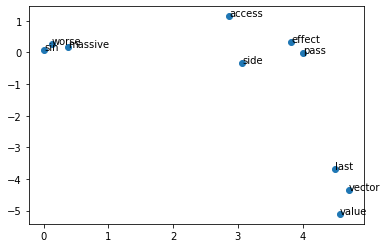

In [35]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(model.wv.vocab)
words = words[:10]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

> # <a> Task 3: 

> Perform topic analysis on the prepossessed textual data. 

> Briefly specify how you pick the number of topics. 

> Present your findings (the final set of topics you extracted, the popularity of each topic). 

> ### <a> Topic Modeling </a>

> Topic Modeling automatically discover the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. 

> These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes. for example, a group words such as 'patient', 'doctor', 'disease', 'cancer', ad 'health' will represents topic 'healthcare'.

> ![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1538411402/Image1_dz0yfl.png)

> ## <a> <center>Text Classification vs topic modeling

> Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. 

> Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics". 

> It is a form of unsupervised learning, so the set of possible topics are unknown. Topic modeling can be used to solve the text classification problem. 

> Topic modeling will identify the topics presents in a document" while text classification classifies the text into a single class.

> ![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1538411402/image2_ndnai9.png)


> ## <a> <center> LDA & LSI


> LSI (also known as Latent Semantic Analysis, LSA) learns latent topics by performing a matrix decomposition (SVD) on the term-document matrix.

> LDA is a generative probabilistic model, that assumes a Dirichlet prior over the latent topics.

> In practice, LSI is much faster to train than LDA, but has lower accuracy.



> [Source](https://www.datacamp.com/tutorial/discovering-hidden-topics-python)

In [36]:
# TODO code for task 3, hint, popularity of each topic is the ratio of documents discussing one topic,
#  you need to read the topic assignment for each document and then calculate this value.

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = gensim.corpora.Dictionary(sentences)

> **Note:** We had used word2vec ,but today in our Tutorial we had use doc2bow so let's try it together .

In [37]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
corpus = [dictionary.doc2bow(text, allow_update = True) for text in sentences]

In [38]:
# creating the object for LDA model
Lda = gensim.models.ldamodel.LdaModel

> ### <A> How to find the optimal number of topics for LDA?

> My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

> Choosing a `k` that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

> If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

> The `compute_Perplexity_and_Coherence_values()` trains multiple LDA models and provides the models and their corresponding coherence scores.

> [Source](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda)

In [74]:
def compute_Perplexity_and_Coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    # Compute c_v coherence for various number of topics

    # Parameters:
    
    # dictionary : Gensim dictionary
    # corpus : Gensim corpus
    # texts : List of input texts
    # limit : Max num of topics

    # Returns:
    
    # model_list : List of LDA topic models
    # coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=1)
        # Compute Perplexity
        model_list.append(model.log_perplexity(corpus)) # a measure of how good the model is. lower the better.

        # Compute Coherence Score
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [75]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_Perplexity_and_Coherence_values(dictionary=dictionary, corpus=corpus, texts=sentences, start=1, limit=21, step=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

CPU times: user 39min, sys: 6min 9s, total: 45min 10s
Wall time: 39min 34s


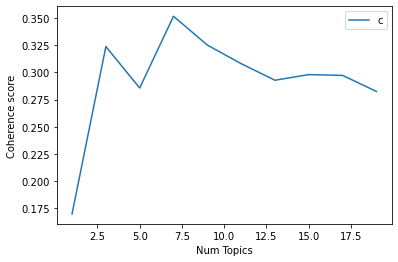

In [76]:
# Show graph for coherence_values
limit=21; start=1; step=2;
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

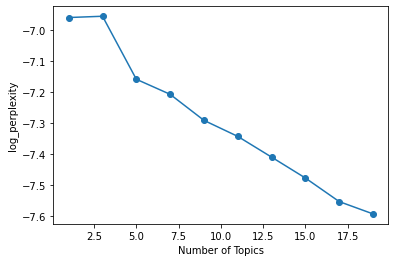

In [77]:
# Show graph for log_perplexity
plt.plot(x, model_list, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('log_perplexity')
plt.show()

> Note: As we see , it is very difficult to determine the appropriate number of topics by using `log_perplexity` .So,  the `coherence` helped us with that.

> If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

> So for further steps I will choose the model with 7 topics itself.

In [78]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.17
Num Topics = 3  has Coherence Value of 0.3238
Num Topics = 5  has Coherence Value of 0.2856
Num Topics = 7  has Coherence Value of 0.3516
Num Topics = 9  has Coherence Value of 0.3251
Num Topics = 11  has Coherence Value of 0.308
Num Topics = 13  has Coherence Value of 0.2928
Num Topics = 15  has Coherence Value of 0.298
Num Topics = 17  has Coherence Value of 0.2972
Num Topics = 19  has Coherence Value of 0.2825


In [79]:
# running and training LDA model on the document.
ldamodel = Lda(corpus, num_topics=7, id2word = dictionary, passes=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [80]:
print('LDA model is : \n' , ldamodel.print_topics(num_topics = 7, num_words=10))

LDA model is : 
 [(0, '0.088*"plot" + 0.049*"r" + 0.033*"ggplot2" + 0.029*"ggplot" + 0.025*"line" + 0.022*"add" + 0.021*"change" + 0.020*"label" + 0.019*"color" + 0.017*"point"'), (1, '0.055*"r" + 0.029*"calculate" + 0.024*"use" + 0.021*"map" + 0.020*"bar" + 0.017*"value" + 0.015*"error" + 0.013*"nest" + 0.013*"return" + 0.013*"loop"'), (2, '0.065*"r" + 0.050*"value" + 0.048*"data" + 0.042*"column" + 0.035*"row" + 0.029*"dataframe" + 0.028*"frame" + 0.027*"columns" + 0.026*"list" + 0.020*"base"'), (3, '0.100*"r" + 0.038*"file" + 0.031*"use" + 0.020*"function" + 0.016*"error" + 0.012*"work" + 0.011*"read" + 0.011*"package" + 0.011*"text" + 0.010*"code"'), (4, '0.064*"shiny" + 0.061*"r" + 0.049*"function" + 0.039*"use" + 0.024*"datatable" + 0.023*"set" + 0.018*"variables" + 0.015*"dplyr" + 0.014*"data" + 0.012*"combine"'), (5, '0.073*"r" + 0.034*"time" + 0.032*"table" + 0.027*"date" + 0.025*"data" + 0.018*"object" + 0.017*"model" + 0.016*"specific" + 0.015*"regression" + 0.015*"format"')

> Finally, `pyLDAVis` is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for `LdaModel()`.

In [81]:
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.199765 -0.132555       1        1  24.669497
3      0.179986 -0.031576       2        1  16.915795
5     -0.054834 -0.202000       3        1  13.569438
0     -0.196860  0.272537       4        1  12.482067
4     -0.038597 -0.097909       5        1  11.710612
6      0.284220  0.050506       6        1  11.085617
1      0.025849  0.140998       7        1   9.566974, topic_info=          Term          Freq         Total Category  logprob  loglift
78        plot  12486.000000  12486.000000  Default  30.0000  30.0000
8263     shiny   8553.000000   8553.000000  Default  29.0000  29.0000
81      column  11914.000000  11914.000000  Default  28.0000  28.0000
2        value  15845.000000  15845.000000  Default  27.0000  27.0000
518      error  11678.000000  11678.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2        value   1808.460826  15845.872291   Topic7  -4.0971   0.1764
805       type    739.005627   1452.170077   Topic7  -4.9920   1.6713
47         way    723.095939   2045.349610   Topic7  -5.0138   1.3071
12    function    962.524013  14091.723530   Topic7  -4.7278  -0.3369
669     ggplot    731.645724   4804.464392   Topic7  -5.0020   0.4648

[383 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
718       1  0.398574       1
718       3  0.210555       1
718       6  0.390204       1
1538      1  0.999312  accord
579       1  0.999398  across
...     ...       ...     ...
66        7  0.516365       x
79        4  0.998325   xaxis
473       2  0.999409     xml
1558      3  0.997986     xts
907       3  0.999191    year

[549 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 1, 5, 7, 2])

> **Notes on the previous cell** : 

> As we can see, there is no overlap between the topics , but if we increase the number of topics, of course, the overlap between the topics will appear

>## <a> Create the TF-IDF matrix (corpus) in gensim


> Here, we're gonna use the TF-IDF Vectorizer approach. So, TF-IDF is an acronym for Term Frequency - Inverse Document Frequency.


> *   TF makes sure to give high score to the word that appears frequently.
*   IDF makes sure to give low score to the word if it appears pretty frequently in documents (not a unique identifier).

> So, the amalgamation of TF * IDF is how the score is calculated for this vectorizer.



> ![link text](https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [82]:
tfidf = gensim.models.tfidfmodel.TfidfModel(corpus)
corpus2_tfidf = tfidf[corpus]
d = {dictionary.get(id): value for doc in corpus2_tfidf for id, value in doc}

> The first 20 key:value pairs form this dict.

In [83]:
# You can get any n key-value pairs though:
list(d.items())[:20]

[('access', 0.3116830771493943),
 ('last', 0.35809529732885276),
 ('value', 0.17350949053001175),
 ('vector', 0.6117028953701457),
 ('effect', 0.5680346213723939),
 ('massive', 0.44549301214874004),
 ('object', 0.259834843980026),
 ('pass', 0.5905130337177521),
 ('side', 0.4582568993582422),
 ('sin', 0.6923505178630321),
 ('worse', 0.5061746877451955),
 ('explain', 0.5760009086269534),
 ('function', 0.2966490908410043),
 ('quantile', 0.49965907889776817),
 ('r', 0.144626037994025),
 ('eof', 0.605979662120293),
 ('flag', 0.6310986876589311),
 ('test', 0.3019162368622578),
 ('count', 0.3187621090567868),
 ('data', 0.16986350894633812)]

> ## **Present your findings :**

> I have learned that there is not only one correct way, but there are many ways that we must try, to learn what is the appropriate solution for each problem.

# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned to each cell separately.



> [How-to-present-results-lda-models](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)


> [How to save a gensim dictionary and corpus to disk and load them back](https://www.machinelearningplus.com/nlp/gensim-tutorial/#7howtosaveagensimdictionaryandcorpustodiskandloadthemback)

> [Discovering-hidden-topics-python](https://www.datacamp.com/tutorial/discovering-hidden-topics-python)


> [StackSample: 10% of Stack Overflow Q&A](https://www.kaggle.com/datasets/stackoverflow/stacksample)




